## Data Science & Machine Learning TASK 1

### PROBLEM STATEMENT :

Sales management has gained importance to meet increasing competition and the need for improved methods of distribution to reduce cost and to increase profits. Sales Management today is the most important function in a commercial and business enterprise.
Do ETL: Extract-Transform-Load some Amazon dataset and find sales-trend -> Monthwise, Yearwise, Yearly Monthwise. Find key metrics and factors and show the meaningful relationships between attributes. Do your own research and come up with your findings.

***Project Partners:***
1. *Sweety Biswas*
2. *Sayani Ghosh*
3. *Pamela Dey*

**Import all necessary libraries:**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

**Read the dataset:**

In [2]:
data = pd.read_csv('100 Sales Records.csv')

**Studying the data set:**

In [3]:
data.head()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,05-02-2014,341417157,05-08-2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,07-05-2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,02-01-2013,115456712,02-06-2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50


In [4]:
data.tail()

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,09-03-2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11-11-2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,06-01-2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,08-08-2015,5767,81.73,56.67,471336.91,326815.89,144521.02
99,Sub-Saharan Africa,Mozambique,Household,Offline,L,02-10-2012,665095412,2/15/2012,5367,668.27,502.54,3586605.09,2697132.18,889472.91


In [5]:
data.shape

(100, 14)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Region          100 non-null    object 
 1   Country         100 non-null    object 
 2   Item Type       100 non-null    object 
 3   Sales Channel   100 non-null    object 
 4   Order Priority  100 non-null    object 
 5   Order Date      100 non-null    object 
 6   Order ID        100 non-null    int64  
 7   Ship Date       100 non-null    object 
 8   Units Sold      100 non-null    int64  
 9   Unit Price      100 non-null    float64
 10  Unit Cost       100 non-null    float64
 11  Total Revenue   100 non-null    float64
 12  Total Cost      100 non-null    float64
 13  Total Profit    100 non-null    float64
dtypes: float64(5), int64(2), object(7)
memory usage: 11.1+ KB


**Checking Data Type:**

In [7]:
data.dtypes

Region             object
Country            object
Item Type          object
Sales Channel      object
Order Priority     object
Order Date         object
Order ID            int64
Ship Date          object
Units Sold          int64
Unit Price        float64
Unit Cost         float64
Total Revenue     float64
Total Cost        float64
Total Profit      float64
dtype: object

**Statistics:**

In [8]:
data.describe()

,Order ID,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
count,1.000000e+02,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02
mean,5.550204e+08,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05
std,2.606153e+08,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05
min,1.146066e+08,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03
25%,3.389225e+08,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05
50%,5.577086e+08,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05
75%,7.907551e+08,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05
max,9.940222e+08,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06


In [9]:
data.columns

Index(['Region', 'Country', 'Item Type', 'Sales Channel', 'Order Priority',
       'Order Date', 'Order ID', 'Ship Date', 'Units Sold', 'Unit Price',
       'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit'],
      dtype='object')

# Data Processing

**Checking if there is any null value:**

In [10]:
data.isnull().sum()

Region            0
Country           0
Item Type         0
Sales Channel     0
Order Priority    0
Order Date        0
Order ID          0
Ship Date         0
Units Sold        0
Unit Price        0
Unit Cost         0
Total Revenue     0
Total Cost        0
Total Profit      0
dtype: int64

* *There is no null value in our data set. So we can proceed with our further steps.*

In [11]:
data.duplicated().sum()

0

**To convert Ship Date to yy-mm-dd format:**

In [12]:
data['Ship Date']=pd.to_datetime(data['Ship Date'])

In [13]:
data['Ship Date']

0    2010-06-27
1    2012-09-15
2    2014-05-08
3    2014-07-05
4    2013-02-06
        ...    
95   2011-09-03
96   2011-12-28
97   2016-06-29
98   2015-08-08
99   2012-02-15
Name: Ship Date, Length: 100, dtype: datetime64[ns]

**First and last Shipping dates:**

In [14]:
data['Ship Date'].min()

Timestamp('2010-02-25 00:00:00')

In [15]:
data['Ship Date'].max()

Timestamp('2017-06-17 00:00:00')

# Exploratory Data Analysis
**Sales Trend**

1. **Month Wise**

In [16]:
data['Month']=data['Ship Date'].apply(lambda x: x.strftime('%m'))
data['Month']

0     06
1     09
2     05
3     07
4     02
      ..
95    09
96    12
97    06
98    08
99    02
Name: Month, Length: 100, dtype: object

In [17]:
data_trendM = data.groupby('Month').sum()['Total Revenue'].reset_index()

Text(0.5, 0, 'Month')

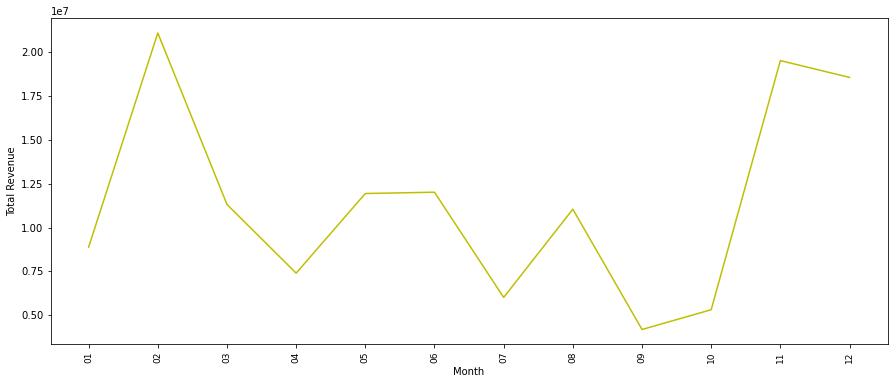

In [18]:
plt.figure(figsize=(15,6))
plt.plot(data_trendM['Month'],data_trendM['Total Revenue'],color = 'y')
plt.xticks(rotation='vertical',size=9)
plt.ylabel('Total Revenue')
plt.xlabel('Month')

**Conclusion**

From the graph we see that 
* The Total Revenue collection are highest at 2nd month i.e. February and 
* Second heighest at 11th month i.e. November.

2. **Year wise**

In [19]:
data['Year'] = data['Ship Date'].apply(lambda x: x.strftime('%Y'))
data['Year']

0     2010
1     2012
2     2014
3     2014
4     2013
      ... 
95    2011
96    2011
97    2016
98    2015
99    2012
Name: Year, Length: 100, dtype: object

In [20]:
data_trendY = data.groupby('Year').sum()['Total Revenue'].reset_index()

Text(0.5, 0, 'Year')

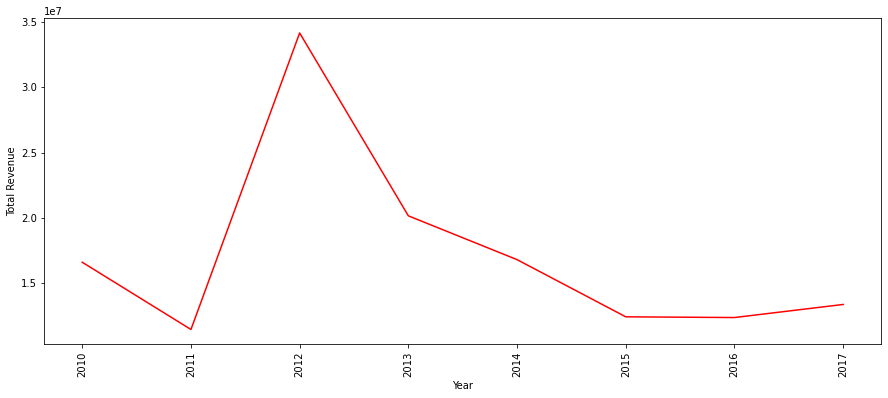

In [21]:
plt.figure(figsize=(15,6))
plt.plot(data_trendY['Year'],data_trendY['Total Revenue'],color = 'r')
plt.xticks(rotation='vertical',size=10)
plt.ylabel('Total Revenue')
plt.xlabel('Year')

**Conclusion**

The Total Revenue collection was highest in 2012.

3. **Yearly Month Wise**

In [22]:
data['month_year'] = data['Ship Date'].apply(lambda x: x.strftime('%Y,%m'))
data['month_year']

0     2010,06
1     2012,09
2     2014,05
3     2014,07
4     2013,02
       ...   
95    2011,09
96    2011,12
97    2016,06
98    2015,08
99    2012,02
Name: month_year, Length: 100, dtype: object

In [23]:
data_trendMY = data.groupby('month_year').sum()['Total Revenue'].reset_index()

([0,
  1,
  2,
  3,
  4,
  5,
  6,
  7,
  8,
  9,
  10,
  11,
  12,
  13,
  14,
  15,
  16,
  17,
  18,
  19,
  20,
  21,
  22,
  23,
  24,
  25,
  26,
  27,
  28,
  29,
  30,
  31,
  32,
  33,
  34,
  35,
  36,
  37,
  38,
  39,
  40,
  41,
  42,
  43,
  44,
  45,
  46,
  47,
  48,
  49,
  50,
  51,
  52,
  53,
  54,
  55,
  56,
  57,
  58,
  59,
  60,
  61,
  62],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
 

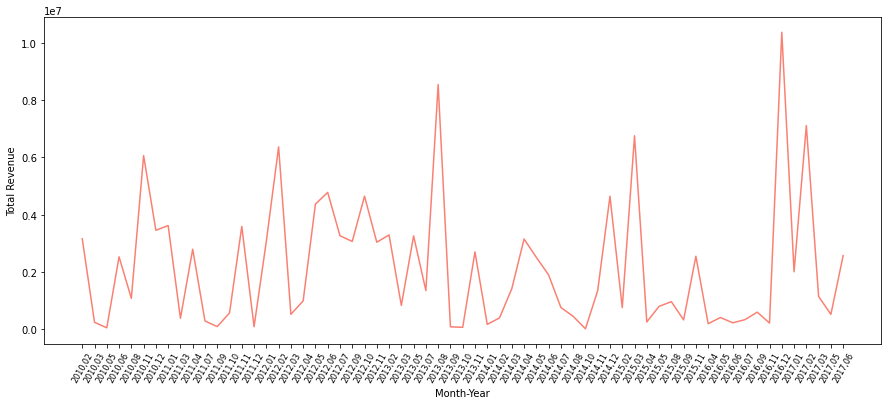

In [24]:
plt.figure(figsize=(15,6))
plt.plot(data_trendMY['month_year'],data_trendMY['Total Revenue'],color = 'SALMON')
plt.xticks(rotation='vertical',size=8)
plt.ylabel('Total Revenue')
plt.xlabel('Month-Year')
plt.xticks(rotation=60)

**Conclusion**

The Total Revenue collection was 
* highest on December, 2016 while 
* on August, 2013 it was second highest.

**Product wise sales**

* **Item Type Vs Total Revenue**

In [25]:
product_sales = pd.DataFrame(data.groupby('Item Type').sum()['Total Revenue'])

In [26]:
product_sales = product_sales.sort_values('Total Revenue',ascending=False)

In [27]:
product_sales

,Total Revenue
Item Type,
Cosmetics,36601509.60
Office Supplies,30585380.07
Household,29889712.29
Baby Food,10350327.60
Clothes,7787292.80
Cereal,5322898.90
Meat,4503675.75
Personal Care,3980904.84
Vegetables,3089057.06


Text(0.5, 1.0, 'BAR PLOT SHOWING PRODUCT RANKING BY TOTAL REVENUE')

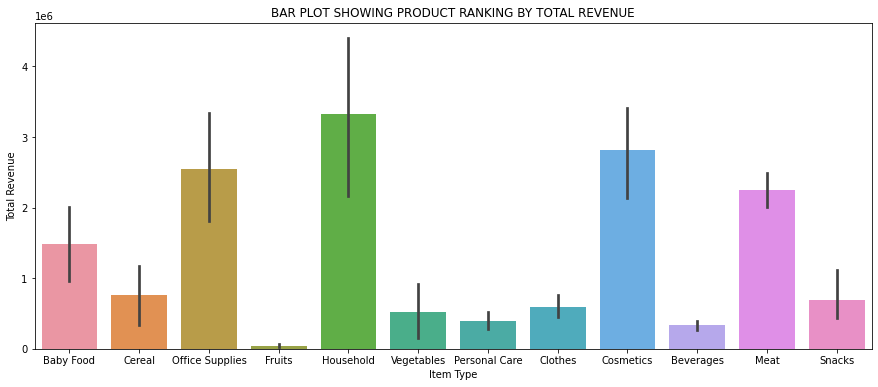

In [28]:
plt.figure(figsize=(15,6))
sns.barplot(x='Item Type', y='Total Revenue',data=data)
plt.title("BAR PLOT SHOWING PRODUCT RANKING BY TOTAL REVENUE")

* **Item Type Vs Units Sold**

In [29]:
product_sell = pd.DataFrame(data.groupby('Item Type').sum()['Units Sold'])
print(product_sell)

                 Units Sold
Item Type                  
Baby Food             40545
Beverages             56708
Cereal                25877
Clothes               71260
Cosmetics             83718
Fruits                49998
Household             44727
Meat                  10675
Office Supplies       46967
Personal Care         48708
Snacks                13637
Vegetables            20051


In [30]:
product_sell.sort_values('Units Sold' ,ascending = False)

,Units Sold
Item Type,
Cosmetics,83718
Clothes,71260
Beverages,56708
Fruits,49998
Personal Care,48708
Office Supplies,46967
Household,44727
Baby Food,40545
Cereal,25877


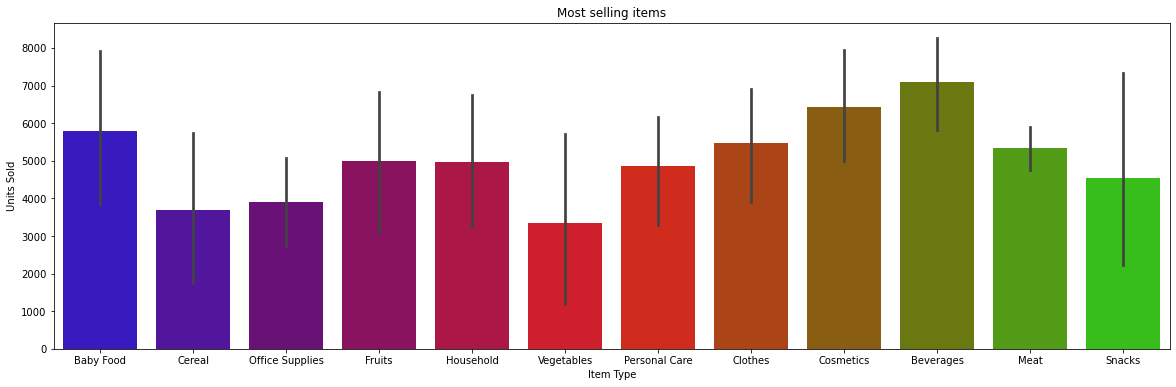

In [31]:
plt.figure(figsize=(20,6))
sns.barplot(x='Item Type', y='Units Sold',data=data,palette='brg')
plt.title('Most selling items')
plt.show()

* **Item Type Vs Total Profit**

In [32]:
Item_profit = pd.DataFrame(data.groupby(['Item Type']).sum()['Total Profit'])
Item_profit.sort_values(['Item Type'],ascending = True)

,Total Profit
Item Type,
Baby Food,3886643.70
Beverages,888047.28
Cereal,2292443.43
Clothes,5233334.40
Cosmetics,14556048.66
Fruits,120495.18
Household,7412605.71
Meat,610610.00
Office Supplies,5929583.75


Text(0.5, 1.0, 'Items with profit')

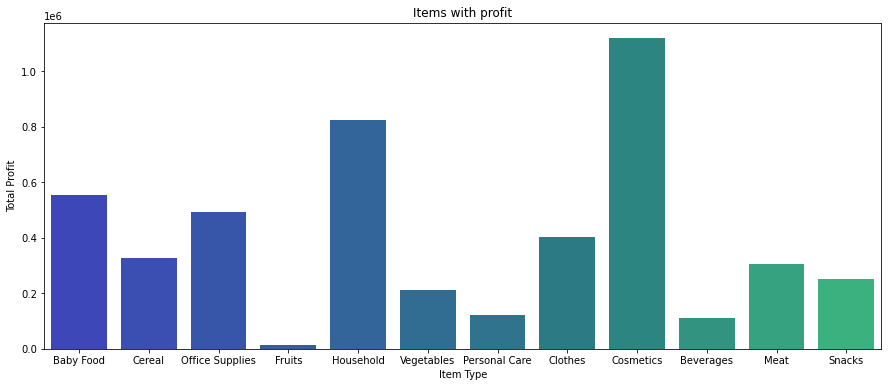

In [33]:
plt.figure(figsize=(15,6))
sns.barplot(x='Item Type', y='Total Profit',data=data,palette='winter', saturation=.5,ci=None)
plt.title("Items with profit")

In [34]:
# checking the categories of order priority
data['Order Priority'].unique()

array(['H', 'C', 'L', 'M'], dtype=object)

* **Count of order priority**

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Order Priority', ylabel='count'>

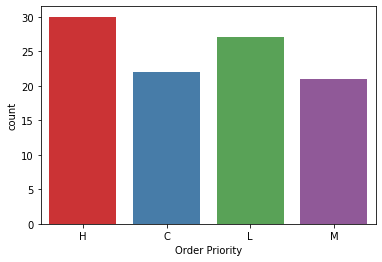

In [35]:
sns.countplot(data['Order Priority'],palette='Set1')

* **Order Priority Vs Total Revenue**

Text(0.5, 1.0, 'Revenue generated by priority')

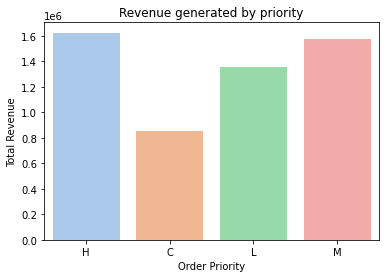

In [36]:
sns.barplot(x='Order Priority', y='Total Revenue',data=data,palette='pastel',ci=None)
plt.title('Revenue generated by priority')

Text(0.5, 1.0, 'items with profit')

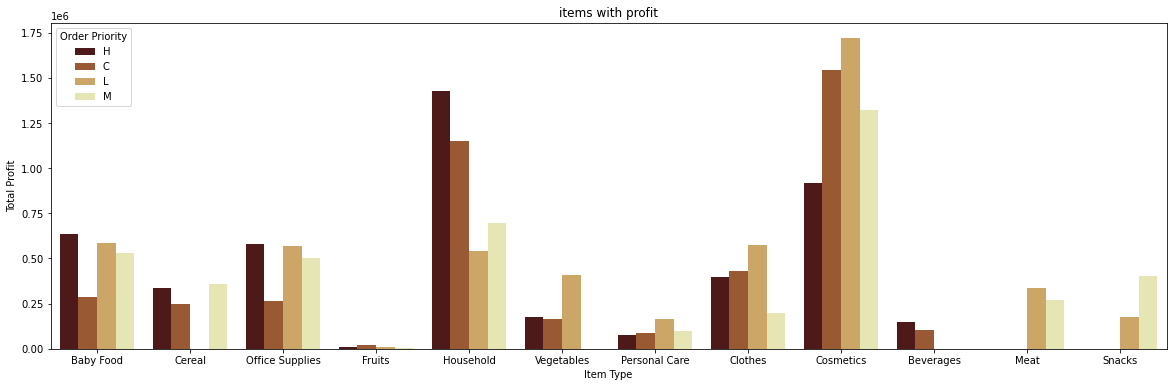

In [37]:
plt.figure(figsize=(20,6))
sns.barplot(x='Item Type', y='Total Profit',data=data,palette='afmhot', saturation=.5,ci=None,hue = 'Order Priority')
plt.title('items with profit')


Text(0.5, 1.0, 'items with profit')

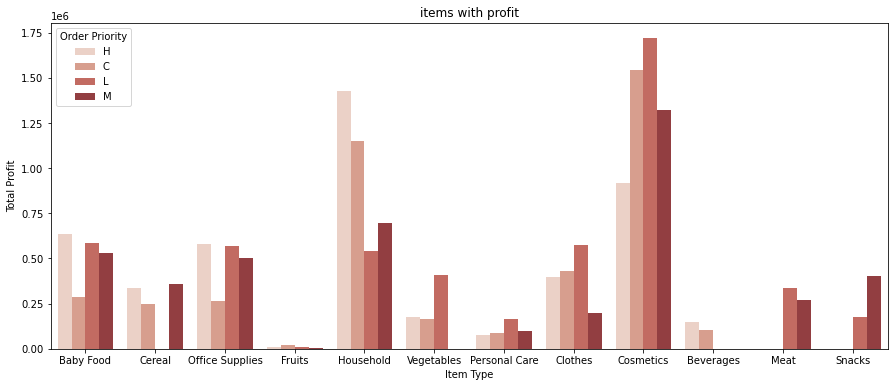

In [38]:
plt.figure(figsize=(15,6))
sns.barplot(x='Item Type', y='Total Profit',data=data,palette='Reds', saturation=.5,ci=None,hue = 'Order Priority')
plt.title('items with profit')

* **Online Vs Offline sales**

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'Count of offline and online sales')

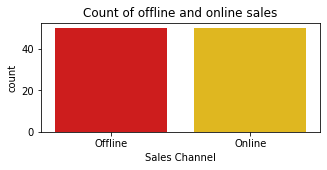

In [39]:
plt.figure(figsize=(5,2))
sns.countplot(data['Sales Channel'],palette='hot')
plt.title('Count of offline and online sales')

<AxesSubplot:xlabel='Sales Channel', ylabel='Total Revenue'>

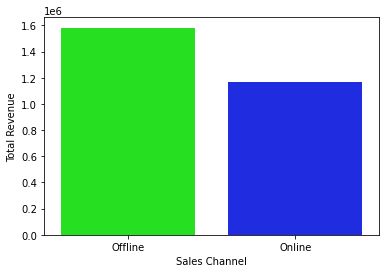

In [40]:
sns.barplot(x='Sales Channel' ,y='Total Revenue',data = data,ci=None,palette="hsv")

* The number of online and offline orders are equal.
* The Total Revenue of Offline sales is more than that of Online sales.

## Done By - Pamela Dey

#### Which is the most profitable category and sub-category
#### grouping item with profit

In [41]:
data.groupby(['Item Type']).sum()['Total Profit']

Item Type
Baby Food           3886643.70
Beverages            888047.28
Cereal              2292443.43
Clothes             5233334.40
Cosmetics          14556048.66
Fruits               120495.18
Household           7412605.71
Meat                 610610.00
Office Supplies     5929583.75
Personal Care       1220622.48
Snacks               751944.18
Vegetables          1265819.63
Name: Total Profit, dtype: float64

In [42]:
Item_profit = pd.DataFrame(data.groupby(['Item Type']).sum()['Total Profit'])

Item_profit.sort_values(['Item Type'],ascending = True)

,Total Profit
Item Type,
Baby Food,3886643.70
Beverages,888047.28
Cereal,2292443.43
Clothes,5233334.40
Cosmetics,14556048.66
Fruits,120495.18
Household,7412605.71
Meat,610610.00
Office Supplies,5929583.75


Text(0.5, 1.0, 'Items with profit')

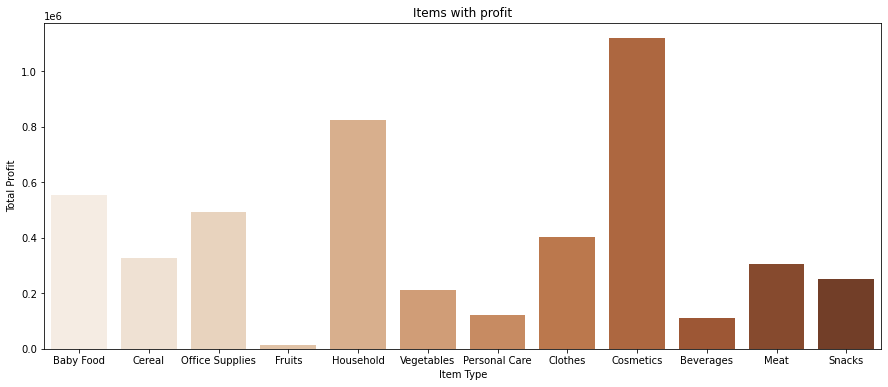

In [43]:
plt.figure(figsize=(15,6))
sns.barplot(x='Item Type',y='Total Profit',data=data,palette="Oranges", saturation=.5,ci=None)
plt.title("Items with profit")

Text(0.5, 1.0, 'Items with profit')

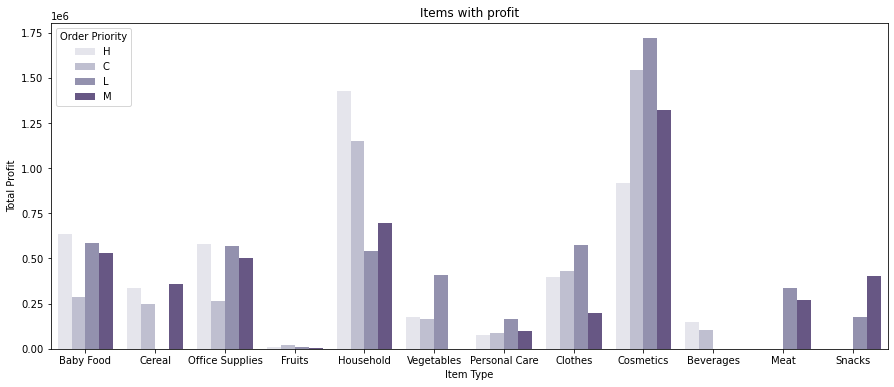

In [44]:
plt.figure(figsize=(15,6))
sns.barplot(x='Item Type',y='Total Profit',data=data,palette="Purples", saturation=.5,ci=None,hue = 'Order Priority')
plt.title("Items with profit")

#### checking for the number categoriesin order priority

In [45]:
data['Order Priority'].unique()

array(['H', 'C', 'L', 'M'], dtype=object)

#### plot showing counts of features in order priority

C:\Users\HP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Order Priority', ylabel='count'>

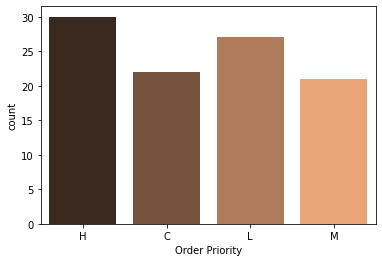

In [46]:
sns.countplot(data['Order Priority'],palette='copper')

#### graph showing priority by total revenue

Text(0.5, 1.0, 'Revenue generated by priority')

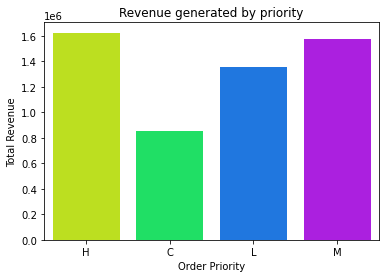

In [47]:
sns.barplot(x='Order Priority',y='Total Revenue',data = data,palette = 'hsv',ci = None)
plt.title('Revenue generated by priority')

#### pot showing items with total profit by order priority

Text(0.5, 1.0, 'Items with profit')

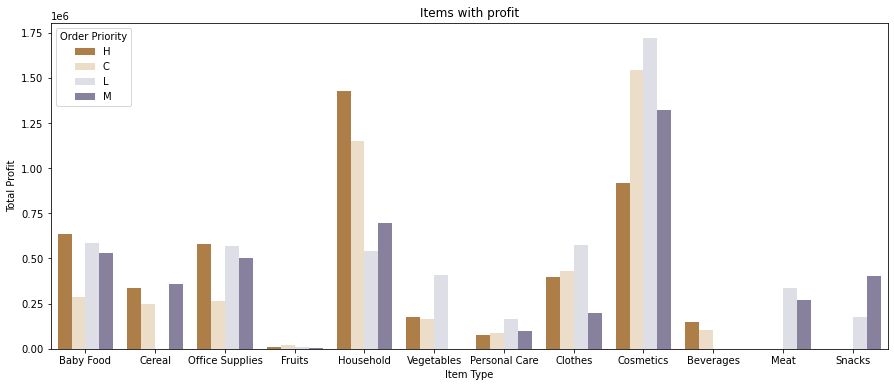

In [48]:
plt.figure(figsize=(15,6))
sns.barplot(x='Item Type',y='Total Profit',data=data,palette='PuOr', saturation=.5,ci=None,hue = 'Order Priority')
plt.title("Items with profit")

## Done By - Sweety Biswas